In [1]:
# some basic imports
import numpy as np
import pandas as pd

In [2]:
# importing file and viewing as dataframe
path = 'Data/IMDB Dataset.csv'
df = pd.read_csv(path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# getting to know shape of data
df.shape

(50000, 2)

In [4]:
# viewing some reviews to know how to clean preprocess
df.iloc[46,0]

"Protocol is an implausible movie whose only saving grace is that it stars Goldie Hawn along with a good cast of supporting actors. The story revolves around a ditzy cocktail waitress who becomes famous after inadvertently saving the life of an Arab dignitary. The story goes downhill halfway through the movie and Goldie's charm just doesn't save this movie. Unless you are a Goldie Hawn fan don't go out of your way to see this film."

#### How to clean and preprocess

- Remove HTML tags
- Remove punctuations
- Lowercase
- Stemm/Lemm
- Tokenize

## Cleaning and Preprocessing Text

In [7]:
# cleaning and preprocessing tools
from nlptools import clean, preprocess

In [8]:
# removing html tags
df['processed'] = df['review'].apply(clean.remove_html_tags)

# removing urls
df['processed'] = df['processed'].apply(clean.remove_urls)

# lowercasing
df['processed'] = df['processed'].str.lower()

# removing punctuations
df['processed'] = df['processed'].apply(clean.remove_punctuations)

# removing stop words
df['processed'] = df['processed'].apply(clean.remove_stopwords)

In [9]:
# stemming
df['processed'] = df['processed'].apply(preprocess.stem_text)

# tokenization
df['processed'] = df['processed'].apply(preprocess.tokenize_text)

In [10]:
df.head()

,review,sentiment,processed
0,One of the other reviewers has mentioned that ...,positive,"[one, review, mention, watch, 1, oz, episod, y..."
1,A wonderful little production. <br /><br />The...,positive,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,"[basic, there, famili, littl, boy, jake, think..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visual, st..."


## Splitting Train / Test Set

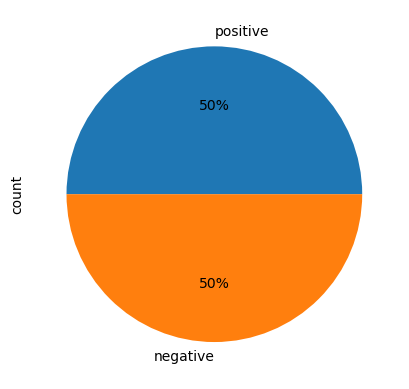

In [12]:
# split of labels
df['sentiment'].value_counts().plot(kind='pie',autopct='%d%%');

In [13]:
# splitting train
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df['processed'],df['sentiment'],test_size=0.2)
x_train.shape, y_test.shape

((40000,), (10000,))

## Textual Representation

In [15]:
# encoding output labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [16]:
# function to build pos/neg frequency table for each word
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    yslist = np.squeeze(ys).tolist()

    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
            
    return freqs

In [27]:
freqs = build_freqs(x_train,y_train)

In [29]:
# function to convert text to numbers
def extract_features(tweets, freqs):
    '''
    Input: 
        tweet: a string containing one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    
    # 3 elements for [bias, positive, negative] counts
    x = np.zeros(3)
    
    # bias term is set to 1
    x[0] = 1
    
    ### START CODE HERE ###
    
    # loop through each word in the list of words
    for word in tweets:
        pos_count = freqs.get((word,1.0),0)
        neg_count = freqs.get((word,0.0),0)
        
        # increment the word count for the positive label 1
        x[1] += pos_count
        
        # increment the word count for the negative label 0
        x[2] += neg_count
        
    ### END CODE HERE ###
    
    x = x[None, :]  # adding batch dimension for further processing
    assert(x.shape == (1, 3))
    return x

In [33]:
extract_features(x_train[0],freqs)

array([[1.00000e+00, 2.95356e+05, 3.02340e+05]])

In [35]:
# collect the training features 'x' and stack them into a matrix 'X'
X_train = np.zeros((len(x_train), 3))
for i in range(len(x_train)):
    X_train[i, :]= extract_features(x_train.iloc[i], freqs)

In [36]:
X_train,y_train

(array([[1.00000e+00, 2.56656e+05, 2.68575e+05],
        [1.00000e+00, 6.22330e+05, 6.93868e+05],
        [1.00000e+00, 6.14463e+05, 6.50229e+05],
        ...,
        [1.00000e+00, 2.73456e+05, 2.68018e+05],
        [1.00000e+00, 4.21202e+05, 4.44221e+05],
        [1.00000e+00, 7.42960e+05, 7.56304e+05]]),
 array([1, 0, 0, ..., 1, 1, 1]))

In [37]:
# for test set
X_test = np.zeros((len(x_test), 3))
for i in range(len(x_test)):
    X_test[i, :]= extract_features(x_test.iloc[i], freqs)

In [38]:
X_test,y_test

(array([[1.00000e+00, 1.68880e+05, 1.76444e+05],
        [1.00000e+00, 3.63875e+05, 4.52126e+05],
        [1.00000e+00, 7.86370e+04, 9.25300e+04],
        ...,
        [1.00000e+00, 5.82024e+05, 5.35159e+05],
        [1.00000e+00, 5.53989e+05, 5.92821e+05],
        [1.00000e+00, 4.99875e+05, 4.72504e+05]]),
 array([0, 0, 0, ..., 1, 0, 1]))

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6913

In [40]:
lr.predict(X_train)

array([0, 0, 0, ..., 1, 0, 1])

In [41]:
lr.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])